In [0]:
!pip install --upgrade -q gspread

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', 26)
pd.set_option('display.max_rows', 20)


In [0]:
# Reading data from Google sheet instead of locally

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('predeclaration_responses_9262018').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
df = pd.DataFrame.from_records(rows)

#Fixing column names
df.columns = df.iloc[0]
df = df.drop([0], axis=0)

df = df.drop(columns=['Email Address', 'Score', 'Full Name:', 'Student Identification Number (SID):', 'CalNet ID:'])

# Display just the first 5, so the output isn't large
df.head()

,Timestamp,Have you completed the Foundations of Data Science requirement?,Have you completed the Calculus I requirement?,Have you completed the Calculus II requirement?,Have you completed the Linear Algebra requirement?,Have you completed the Program Structures requirement?,Have you completed the Data Structures requirement?,Have you completed the Principles and Techniques of Data Science requirement?,Have you completed one course towards the Computational and Inferential Depth requirement?,Have you completed the second course towards the Computational and Inferential Depth requirement?,Have you completed the Probability requirement?,Have you completed the Human Contexts and Ethics requirement?,"Have you completed the Modeling, Learning, and Decision-Making requirement?",Have you completed one lower-division course towards a Domain Emphasis?,Have you completed one upper-division course towards a Domain Emphasis?,Have you completed a second upper-division course towards a Domain Emphasis?,Are you a transfer student?,Are you expected to graduate in Fall 2018?,Are you expected to graduate in Spring or Summer 2019?,What is your current Expected Graduation Term?,Are you currently already declared in another major?
1,8/9/2018 15:33:24,Yes,Yes,Yes,In progress in Fall 2018,In progress in Fall 2018,No,,,,,,,,,,,,,,
2,8/9/2018 15:34:04,Yes,Yes,Yes,Yes,Yes,Yes,Yes,In progress in Fall 2018,No,Yes,In progress in Fall 2018,No,Yes,Yes,In progress in Fall 2018,No,No,Yes,,Yes
3,8/9/2018 15:34:21,Yes,Yes,Yes,In progress in Fall 2018,In progress in Fall 2018,No,,,,,,,,,,,,,,
4,8/9/2018 15:35:11,Yes,Yes,Yes,Yes,Yes,In progress in Fall 2018,In progress in Fall 2018,No,No,In progress in Fall 2018,No,No,Yes,Yes,No,No,No,No,Spring 2020,No
5,8/9/2018 15:35:11,Yes,Yes,Yes,Yes,Yes,In progress in Fall 2018,In progress in Fall 2018,No,No,No,No,No,Yes,Yes,In progress in Fall 2018,No,No,No,Spring 2020,No


# **HOTKEY ENCODING**

In [0]:
#encoding yes and no to 0's and 1's
#TODO: this method can only be run once per runtime, fix..
def hot_encoding(df):
  for col in list(df):
    df[col].replace(('Yes', 'No', 'In progress in Fall 2018', ''), (1, 0, 1, 0), inplace=True)
    
hot_encoding(df)
df

,Timestamp,Have you completed the Foundations of Data Science requirement?,Have you completed the Calculus I requirement?,Have you completed the Calculus II requirement?,Have you completed the Linear Algebra requirement?,Have you completed the Program Structures requirement?,Have you completed the Data Structures requirement?,Have you completed the Principles and Techniques of Data Science requirement?,Have you completed one course towards the Computational and Inferential Depth requirement?,Have you completed the second course towards the Computational and Inferential Depth requirement?,Have you completed the Probability requirement?,Have you completed the Human Contexts and Ethics requirement?,"Have you completed the Modeling, Learning, and Decision-Making requirement?",Have you completed one lower-division course towards a Domain Emphasis?,Have you completed one upper-division course towards a Domain Emphasis?,Have you completed a second upper-division course towards a Domain Emphasis?,Are you a transfer student?,Are you expected to graduate in Fall 2018?,Are you expected to graduate in Spring or Summer 2019?,What is your current Expected Graduation Term?,Are you currently already declared in another major?
1,8/9/2018 15:33:24,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8/9/2018 15:34:04,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1,0,1
3,8/9/2018 15:34:21,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8/9/2018 15:35:11,1,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,Spring 2020,0
5,8/9/2018 15:35:11,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,Spring 2020,0
6,8/9/2018 15:35:40,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,Fall 2019,0
7,8/9/2018 15:35:41,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1
8,8/9/2018 15:35:41,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,Fall 2019,1
9,8/9/2018 15:35:43,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,Spring 2020,1
10,8/9/2018 15:35:46,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,Spring 2020,1


In [0]:
grouped_by_grad_term = df.groupby(df['What is your current Expected Graduation Term?'])
grouped_by_grad_term.agg(sum)

,Have you completed the Foundations of Data Science requirement?,Have you completed the Calculus I requirement?,Have you completed the Calculus II requirement?,Have you completed the Linear Algebra requirement?,Have you completed the Program Structures requirement?,Have you completed the Data Structures requirement?,Have you completed the Principles and Techniques of Data Science requirement?,Have you completed one course towards the Computational and Inferential Depth requirement?,Have you completed the second course towards the Computational and Inferential Depth requirement?,Have you completed the Probability requirement?,Have you completed the Human Contexts and Ethics requirement?,"Have you completed the Modeling, Learning, and Decision-Making requirement?",Have you completed one lower-division course towards a Domain Emphasis?,Have you completed one upper-division course towards a Domain Emphasis?,Have you completed a second upper-division course towards a Domain Emphasis?,Are you a transfer student?,Are you expected to graduate in Fall 2018?,Are you expected to graduate in Spring or Summer 2019?,Are you currently already declared in another major?
What is your current Expected Graduation Term?,,,,,,,,,,,,,,,,,,,
0,286,327,303,272,288,173,141,158,110,137,95,66,160,130,85,54,22,161,146
Fall 2019,23,28,28,27,28,27,18,17,10,15,16,4,17,11,5,6,0,0,16
Fall 2020,6,6,6,6,6,5,4,1,0,4,0,0,5,3,1,2,0,0,4
Fall 2021,3,3,3,3,3,3,0,0,0,0,0,0,1,0,0,0,0,0,0
Spring 2020,271,290,281,282,285,279,200,162,71,149,94,14,211,131,35,13,0,0,143
Spring 2021,100,118,117,98,115,109,32,7,2,15,16,1,45,9,0,1,0,0,20
Spring 2022,2,3,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Summer 2020,7,8,6,6,7,5,1,2,1,3,2,0,5,1,1,5,0,0,3


In [0]:
# Table of the number of students that answered NO.
answered_no = grouped_by_grad_term.count().subtract(grouped_by_grad_term.agg(sum))

answered_no

,Are you a transfer student?,Are you currently already declared in another major?,Are you expected to graduate in Fall 2018?,Are you expected to graduate in Spring or Summer 2019?,Have you completed a second upper-division course towards a Domain Emphasis?,Have you completed one course towards the Computational and Inferential Depth requirement?,Have you completed one lower-division course towards a Domain Emphasis?,Have you completed one upper-division course towards a Domain Emphasis?,Have you completed the Calculus I requirement?,Have you completed the Calculus II requirement?,Have you completed the Data Structures requirement?,Have you completed the Foundations of Data Science requirement?,Have you completed the Human Contexts and Ethics requirement?,Have you completed the Linear Algebra requirement?,"Have you completed the Modeling, Learning, and Decision-Making requirement?",Have you completed the Principles and Techniques of Data Science requirement?,Have you completed the Probability requirement?,Have you completed the Program Structures requirement?,Have you completed the second course towards the Computational and Inferential Depth requirement?,Timestamp,What is your current Expected Graduation Term?
What is your current Expected Graduation Term?,,,,,,,,,,,,,,,,,,,,,
0,274,182,306,167,243,170,168,198,1,25,155,42,233,56,262,187,191,40,218,NaN,NaN
Fall 2019,22,12,28,28,23,11,11,17,0,0,1,5,12,1,24,10,13,0,18,NaN,NaN
Fall 2020,5,3,7,7,6,6,2,4,1,1,2,1,7,1,7,3,3,1,7,NaN,NaN
Fall 2021,3,3,3,3,3,3,2,3,0,0,0,0,3,0,3,3,3,0,3,NaN,NaN
Spring 2020,277,147,290,290,255,128,79,159,0,9,11,19,196,8,276,90,141,5,219,NaN,NaN
Spring 2021,117,98,118,118,118,111,73,109,0,1,9,18,102,20,117,86,103,3,116,NaN,NaN
Spring 2022,5,5,5,5,5,5,5,5,2,3,4,3,5,4,5,5,5,4,5,NaN,NaN
Summer 2020,3,5,8,8,7,6,3,7,0,2,3,1,6,2,8,7,5,1,7,NaN,NaN


,Students that responded YES or IN PROGRESS,Survey question,Students that responded NO
4,127,Have you completed a second upper-division cou...,660
5,285,Have you completed one upper-division course t...,502
6,444,Have you completed one lower-division course t...,343
7,85,"Have you completed the Modeling, Learning, and...",702
8,223,Have you completed the Human Contexts and Ethi...,564
9,323,Have you completed the Probability requirement?,464
10,194,Have you completed the second course towards t...,593
11,347,Have you completed one course towards the Comp...,440
12,396,Have you completed the Principles and Techniqu...,391


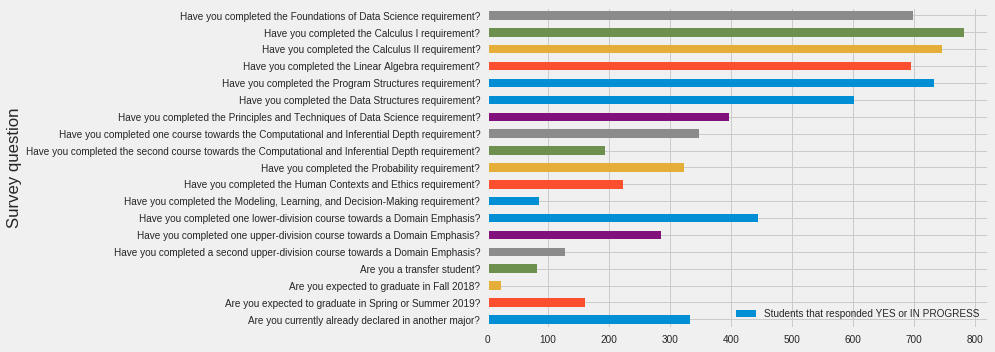

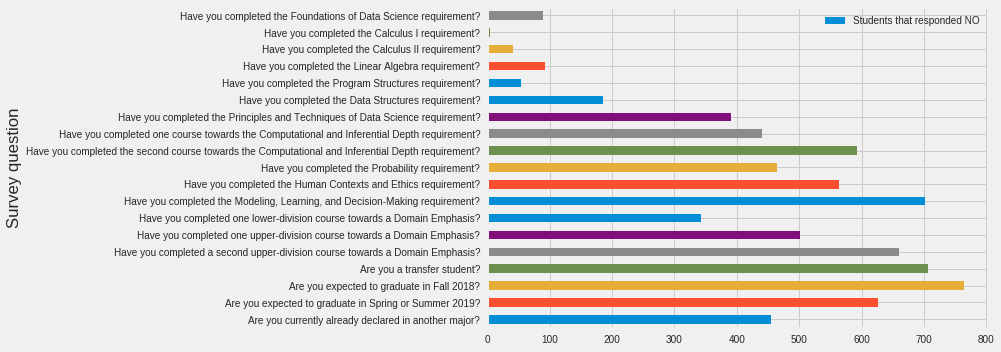

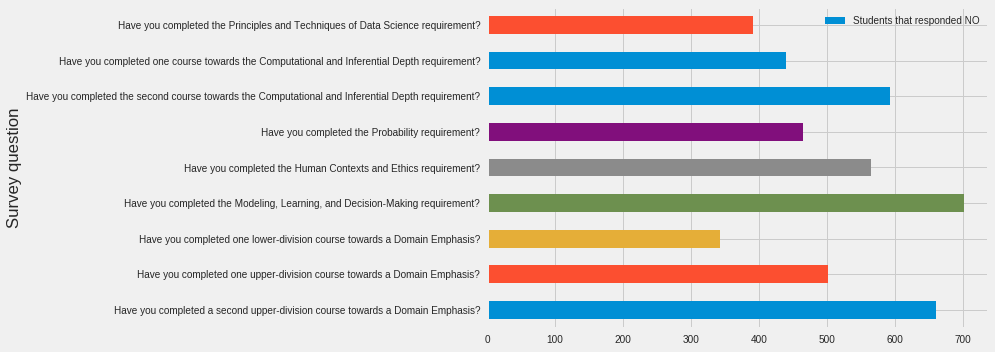

In [0]:
#Plot a bar graph of data frame after hot key encoding
sums = list(df.sum()[1:])[::-1]
cols = list(df)[1:][::-1]

# This question wasn't included in the sums, since it has variable answers that could not be encoded
cols.remove('What is your current Expected Graduation Term?')

df_plot = pd.DataFrame({'Survey question' : cols, 'Students that responded YES or IN PROGRESS' : sums})
df_plot.plot.barh(x='Survey question', y='Students that responded YES or IN PROGRESS')

df_plot['Students that responded NO'] = len(df) - df_plot['Students that responded YES or IN PROGRESS']
df_plot.plot.barh(x='Survey question', y='Students that responded NO')

df_plot[4:13].plot.barh(x='Survey question', y='Students that responded NO')
df_plot[4:13]

In [0]:
#Select rows of students who have completed lower division requirements
upper_div_labels = ['Timestamp', 'Have you completed the Principles and Techniques of Data Science requirement?', 'Have you completed one course towards the Computational and Inferential Depth requirement?', 'Have you completed the second course towards the Computational and Inferential Depth requirement?', 'Have you completed the Probability requirement?', 'Have you completed the Human Contexts and Ethics requirement?', 'Have you completed the Modeling, Learning, and Decision-Making requirement?', 'Have you completed one lower-division course towards a Domain Emphasis?', 'Have you completed one upper-division course towards a Domain Emphasis?', 'Have you completed a second upper-division course towards a Domain Emphasis?', 'Are you a transfer student?', 'Are you expected to graduate in Fall 2018?', 'Are you expected to graduate in Spring or Summer 2019?', 'What is your current Expected Graduation Term?', 'Are you currently already declared in another major?']
number_lower_div = df[df == 1].drop(columns = upper_div_labels).dropna().shape[0]
lower_div_labels = ['Have you completed the Foundations of Data Science requirement?', 'Have you completed the Calculus I requirement?', 'Have you completed the Calculus II requirement?', 'Have you completed the Linear Algebra requirement?', 'Have you completed the Program Structures requirement?', 'Have you completed the Data Structures requirement?']


In [0]:
#sort through each column for only Yes values or 1's
lower_div = df.loc[lambda df: df['Have you completed the Data Structures requirement?'] ==1]
lower_div = lower_div.loc[lambda df: df['Have you completed the Foundations of Data Science requirement?'] ==1]
lower_div = lower_div.loc[lambda df: df['Have you completed the Calculus I requirement?'] ==1]
lower_div = lower_div.loc[lambda df: df['Have you completed the Calculus II requirement?'] ==1]
lower_div = lower_div.loc[lambda df: df['Have you completed the Linear Algebra requirement?'] ==1]



#Table with rows of students who have completed lower division requirements
lower_div = lower_div.loc[lambda df: df['Have you completed the Program Structures requirement?'] ==1]

#number of students who have completed lower division
num_lower_div = lower_div.shape[0]

#Table with rows of students who have also completed HCE
lower_div_and_HCE = lower_div.loc[lambda df: df['Have you completed the Human Contexts and Ethics requirement?'] ==1]

#number of students who have also completed HCE
num_lower_div_and_HCE = lower_div_and_HCE.shape[0]

#Table with rows of students who are declared in another major
lower_div_and_declared = lower_div.loc[lambda df: df['Are you currently already declared in another major?'] ==1]

#number of students who are declared in another major
num_lower_div_and_declared = lower_div_and_declared.shape[0]

lower_div

,Timestamp,Have you completed the Foundations of Data Science requirement?,Have you completed the Calculus I requirement?,Have you completed the Calculus II requirement?,Have you completed the Linear Algebra requirement?,Have you completed the Program Structures requirement?,Have you completed the Data Structures requirement?,Have you completed the Principles and Techniques of Data Science requirement?,Have you completed one course towards the Computational and Inferential Depth requirement?,Have you completed the second course towards the Computational and Inferential Depth requirement?,Have you completed the Probability requirement?,Have you completed the Human Contexts and Ethics requirement?,"Have you completed the Modeling, Learning, and Decision-Making requirement?",Have you completed one lower-division course towards a Domain Emphasis?,Have you completed one upper-division course towards a Domain Emphasis?,Have you completed a second upper-division course towards a Domain Emphasis?,Are you a transfer student?,Are you expected to graduate in Fall 2018?,Are you expected to graduate in Spring or Summer 2019?,What is your current Expected Graduation Term?,Are you currently already declared in another major?
2,8/9/2018 15:34:04,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1,0,1
4,8/9/2018 15:35:11,1,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,Spring 2020,0
5,8/9/2018 15:35:11,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,Spring 2020,0
6,8/9/2018 15:35:40,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,Fall 2019,0
7,8/9/2018 15:35:41,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1
8,8/9/2018 15:35:41,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,Fall 2019,1
9,8/9/2018 15:35:43,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,Spring 2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,9/23/2018 23:56:55,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,0,0,Spring 2020,0
769,9/24/2018 10:31:26,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1


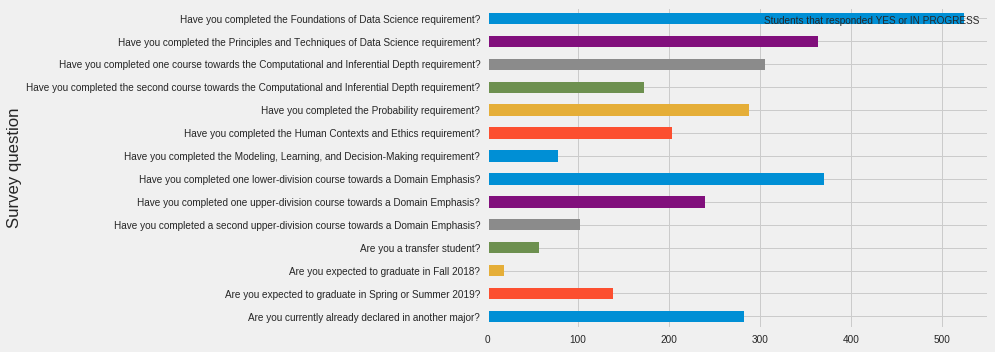

In [0]:
#plot comparing categories
#drop_first_cols = lower_div.drop(columns = lower_div_labels)
#sum_completed = drop_first_cols.sum()
#cols_completed = len(list(drop_first_cols))
#sum_completed
#new_plot = pd.DataFrame({'Survey question' : cols_completed, 'Completed requirement' : sum_completed})
lower_div_labels_total = ['Have you completed the Calculus I requirement?', 'Have you completed the Calculus II requirement?', 'Have you completed the Linear Algebra requirement?', 'Have you completed the Program Structures requirement?', 'Have you completed the Data Structures requirement?']

drop_first_cols = lower_div.drop(columns = lower_div_labels_total)
sum_completed = list(drop_first_cols.sum()[1:])[::-1]
cols_completed = list(drop_first_cols)[1:][::-1]

cols_completed.remove('What is your current Expected Graduation Term?')

lowerdiv_plot = pd.DataFrame({'Survey question' : cols_completed, 'Students that responded YES or IN PROGRESS' : sum_completed})
lowerdiv_plot.plot.barh(x='Survey question', y='Students that responded YES or IN PROGRESS')

In [0]:

sums_index = pd.Index(sums)
cols_index = pd.Index(cols)
sum_completed_index = pd.Index(sum_completed)
cols_completed_index = pd.Index(cols_completed)

non_lowerdiv_plot = pd.DataFrame({'Survey question' : cols_index - cols_completed_index, 'Students that responded YES or IN PROGRESS' : sums_index - sum_completed_index})
non_lowerdiv_plot.plot.barh(x='Survey question', y='Students that responded YES or IN PROGRESS')

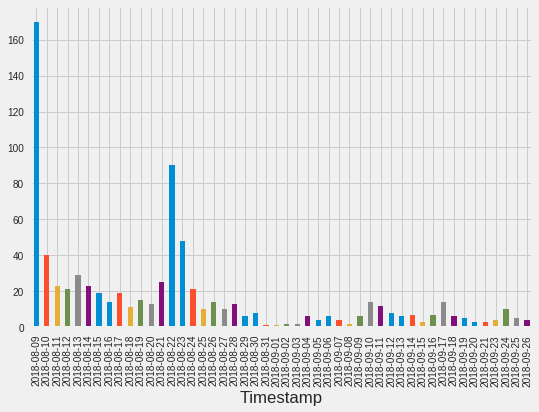

In [0]:
# Converting to pandas Timestamp objects
df.Timestamp = df.Timestamp.apply(pd.to_datetime)

# Plotting the counts of how many people submitted the form per day, for Mariah
df.Timestamp.groupby(df['Timestamp'].dt.date).count().plot(kind="bar")

In [0]:
#Checking for incomplete surveys, seems like everything is answered
df.loc[:,'Have you completed the Foundations of Data Science requirement?'].value_counts()

1    698
0     89
Name: Have you completed the Foundations of Data Science requirement?, dtype: int64

In [0]:
#use this for linear SVC (multi-feature linear regression model), dummydata should be Y values.
#dummydata = (np.random.rand(787) > 0.1).astype(int)

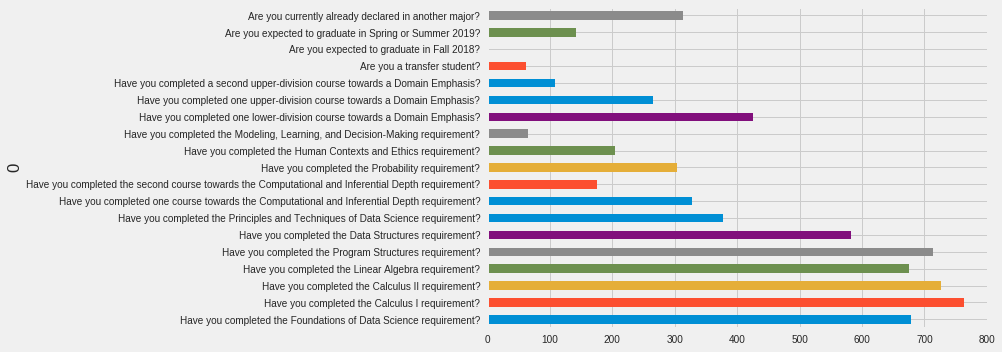

In [0]:
def completeddiff(df):
  df_notime = df.drop(['Timestamp','What is your current Expected Graduation Term?'], axis=1)
  sum_df_notime = df_notime.apply(sum)
  return sum_df_notime.subtract(len(sum_df_notime)).apply(abs)
  
cdf_all = completeddiff(df)
cdf_all.plot.barh(x='Survey question', y='Students that responded YES or IN PROGRESS')
cdf_upperdivonly = completeddiff(lower_div)
#cdf_upperdivonly.plot.barh(x='Survey question', y='Students that responded YES or IN PROGRESS')
#cols_completed

In [0]:
#function to find difference of any two columns in a data frame using label names

def completeddiffcols(df, colname_1, colname_2):
  df_notime = df.drop(['Timestamp','What is your current Expected Graduation Term?'], axis=1)
  sum_df_col1 = df.loc[:, colname_1].sum()
  sum_df_col2 = df.loc[:, colname_2].sum()
  return abs(sum_df_col1 - sum_df_col2)

#find absolute value difference of two columns in df
completeddiffcols(df, 'Have you completed a second upper-division course towards a Domain Emphasis?', 'Have you completed one upper-division course towards a Domain Emphasis?')

#find absolute value difference of two columns in lower_div
completeddiffcols(lower_div, 'Have you completed a second upper-division course towards a Domain Emphasis?', 'Have you completed one upper-division course towards a Domain Emphasis?')

138

In [0]:
#use this for linear SVC (multi-feature linear regression model), dummydata should be Y values.

from sklearn import svm
df_asmatrix = df.drop(['Timestamp','What is your current Expected Graduation Term?'], axis=1).values
dummydata = (np.random.rand(787) > 0.1).astype(int)
lin_clf = svm.LinearSVC()
lin_clf.fit(df_asmatrix, dummydata)

#df_asmatrix
#lin_clf.predict(df_asmatrix)

#sample dummydata 500 times
dummydata

# ???
dd = pd.DataFrame(data=dummydata)
dd_array = np.array
for i in range(500):
  dd_array = np.append(dd_array, dd.sample(n=len(dummydata),replace=True))
  
dd_array

array([<built-in function array>, 1, 1, ..., 1, 1, 1], dtype=object)